In [ ]:
import pandas as pd
from fastai.vision.all import *
from sklearn.model_selection import train_test_split
import os
from glob import glob
from sklearn import metrics

CheXpert Race v2 Validation on BRAX Dataset

In [ ]:
lst = os.listdir('/content/India_TB')
test_df = pd.DataFrame(lst, columns = ['Path'])
test_df = 'India_TB/' + test_df['Path']
test_df = test_df.to_frame()
chexpert_race2_model = load_learner('/content/chexpert_race2.pkl')
chexpert_race2_model.dls.to(device='cuda')
chexpert_race2_model.model.to(device='cuda')
race_test_dl = chexpert_race2_model.dls.test_dl(test_df)
race_preds = chexpert_race2_model.get_preds(dl=race_test_dl, with_decoded=True)
chexpert_race2_model.dls.vocab

['Hispanic/Latino', 'Non-Hispanic Asian', 'Non-Hispanic Black', 'Non-Hispanic White']

[0.12162162 0.30630631 0.16666667 0.40540541]


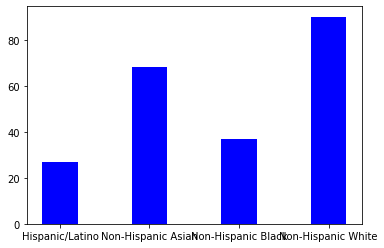

In [ ]:
race_labels = chexpert_race2_model.dls.vocab.o2i.keys()
prediction_counts = [race_preds[2].tolist().count(0), race_preds[2].tolist().count(1), race_preds[2].tolist().count(2), race_preds[2].tolist().count(3)]
plt.bar(race_labels, prediction_counts, color ='blue', width = 0.4)
print(np.array(prediction_counts)/len(test_df))

In [ ]:
test_df.insert(len(test_df.columns), 'Race/Ethnicity_Tensor_Id', race_preds[2].numpy())
test_df.insert(len(test_df.columns), 'Race/Ethnicity_Probability', race_preds[0].numpy().tolist())
print(test_df)
test_df.to_csv('/content/sample_data/chexpert_race_v2_india_test.csv')

                   Path  Race/Ethnicity_Tensor_Id  \
0      India_TB/n12.jpg                         1   
1     India_TB/px43.jpg                         3   
2     India_TB/px36.jpg                         3   
3      India_TB/nx9.jpg                         3   
4       India_TB/n4.jpg                         3   
..                  ...                       ...   
217  India_TB/pd735.jpg                         3   
218  India_TB/pd235.jpg                         1   
219    India_TB/n23.jpg                         3   
220    India_TB/n18.jpg                         3   
221   India_TB/px10.jpg                         0   

                                                                  Race/Ethnicity_Probability  
0    [0.028444107621908188, 0.9438753128051758, 0.0011212147073820233, 0.026559356600046158]  
1      [0.04665374010801315, 0.0032387671526521444, 0.41874828934669495, 0.5313591957092285]  
2       [0.16170355677604675, 0.09033054113388062, 0.030380768701434135, 0.717

MIMIC Race Validation on BRAX Dataset

In [ ]:
lst = os.listdir('/content/India_TB')
test_df = pd.DataFrame(lst, columns = ['Path'])
test_df = 'content/India_TB/' + test_df['Path']
test_df = test_df.to_frame()
mimic_race_model = load_learner('/content/mimic_race.pkl')
mimic_race_model.dls.to(device='cuda')
mimic_race_model.model.to(device='cuda')
race_test_dl = mimic_race_model.dls.test_dl(test_df)
race_preds = mimic_race_model.get_preds(dl=race_test_dl, with_decoded=True)
mimic_race_model.dls.vocab

['Asian', 'Black', 'Hispanic/Latino', 'Other', 'White']

[0.15315315 0.59009009 0.         0.         0.25675676]


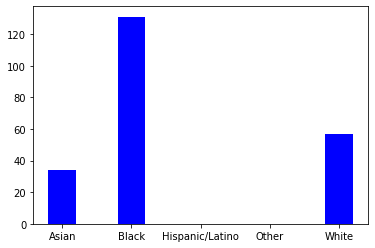

In [ ]:
race_labels = mimic_race_model.dls.vocab.o2i.keys()
prediction_counts = [race_preds[2].tolist().count(0), race_preds[2].tolist().count(1), race_preds[2].tolist().count(2), race_preds[2].tolist().count(3), race_preds[2].tolist().count(4)]
plt.bar(race_labels, prediction_counts, color ='blue', width = 0.4)
print(np.array(prediction_counts)/len(test_df))

In [ ]:
test_df.insert(len(test_df.columns), 'Race/Ethnicity_Tensor_Id', race_preds[2].numpy())
test_df.insert(len(test_df.columns), 'Race/Ethnicity_Probability', race_preds[0].numpy().tolist())
print(test_df)
test_df.to_csv('/content/sample_data/mimic_race_india_test.csv')

                           Path  Race/Ethnicity_Tensor_Id  \
0      content/India_TB/n12.jpg                         0   
1     content/India_TB/px43.jpg                         1   
2     content/India_TB/px36.jpg                         1   
3      content/India_TB/nx9.jpg                         1   
4       content/India_TB/n4.jpg                         1   
..                          ...                       ...   
217  content/India_TB/pd735.jpg                         1   
218  content/India_TB/pd235.jpg                         1   
219    content/India_TB/n23.jpg                         1   
220    content/India_TB/n18.jpg                         4   
221   content/India_TB/px10.jpg                         4   

                                                                                    Race/Ethnicity_Probability  
0       [0.510676920413971, 0.14990752935409546, 0.1814465969800949, 0.07645566016435623, 0.08151333779096603]  
1    [0.004389429930597544, 0.59150910377